In [11]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from visual_homing import VisualHomingAgent
from My_TestFunction import LearningWalkAgent, OneWalk_MaxDistance, OneWalk_TotleArea
import Diencephalon_Testfun2
import image_processing
import helper_function

# 加载数据
world = sio.loadmat('D:/Coding/InsectNavigationToolkitModelling-master/data/world.mat')
route_memory = sio.loadmat('D:/Coding/InsectNavigationToolkitModelling-master/data/RouteMemory_Test.mat')
home_memory = sio.loadmat('D:/Coding/InsectNavigationToolkitModelling-master/data/HomeMemory_X0Y0.mat')

# 初始化 MB 网络参数
num_pn = 81
num_kc = 4000
vh_learning_rate = 0.015
vh_kc_thr = 0.04
zm_n_max = 16
TestMemory = dict(h=[], imgs=[], pos=[[]], ZM_As=[], ZM_Ps=[])
z = 0.01

# 创建视觉导航实例
vh = VisualHomingAgent(world, TestMemory, home_memory, zm_n_max, vh_learning_rate, vh_kc_thr, num_pn, num_kc)

# 创建仿真蚂蚁代理（Diencephalon_Testfun2中定义）
agent = helper_function.LearningWalkAgent(world, 0, 0, 0, vh, route_memory, 30)


In [12]:
import importlib
importlib.reload(helper_function)

<module 'helper_function' from 'd:\\Coding\\My_VisualHoming_Test\\Image_Input\\helper_function.py'>

[392.]
[386.165]
[374.765]
[377.96]
实际走了 90 步


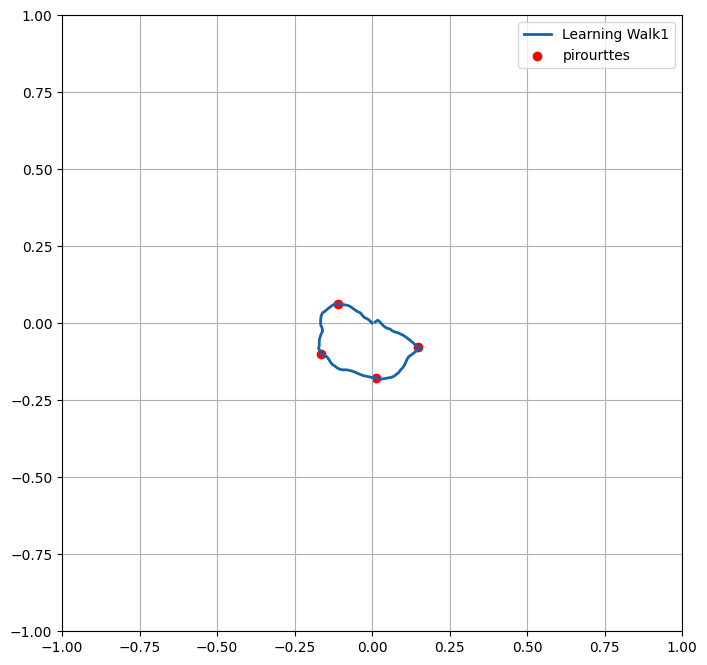

0.19186662885725003 0.04995743993258825


In [13]:
LWX1,LWY1,LWLX1,LWLY1,LWH1,LWL1,LWV1,LWHead1,Actual_Step1,Weight_Record1,T1,T_Scan1=agent.AllWalk1(Count=20,StepUnit=0.01,Total_Step=93,beta=0.30,Proper_PI_Distance=0.12,
                                                                         kappa=30, eps=0.02, Step_minRate=0.23,Step_maxRate=0.85,Scan_Interval=30, sigma=0.18,random_rate=0.7)

# 绘制轨迹图
plt.figure(figsize=(8, 8))
plt.plot(LWX1, LWY1, color='#1663A9', linewidth=2, label='Learning Walk1')
plt.scatter(LWLX1, LWLY1, color='red', marker='o', label='pirourttes')
plt.legend()
plt.grid(True)
plt.xlim([-1,1]);plt.ylim([-1,1])
plt.show()
D1=helper_function.OneWalk_MaxDistance(LWX1,LWY1);A1=helper_function.OneWalk_TotleArea(LWX1[1::1],LWY1[1::1])
print(D1,A1)

[0.61440323 0.34000968 0.04559677]


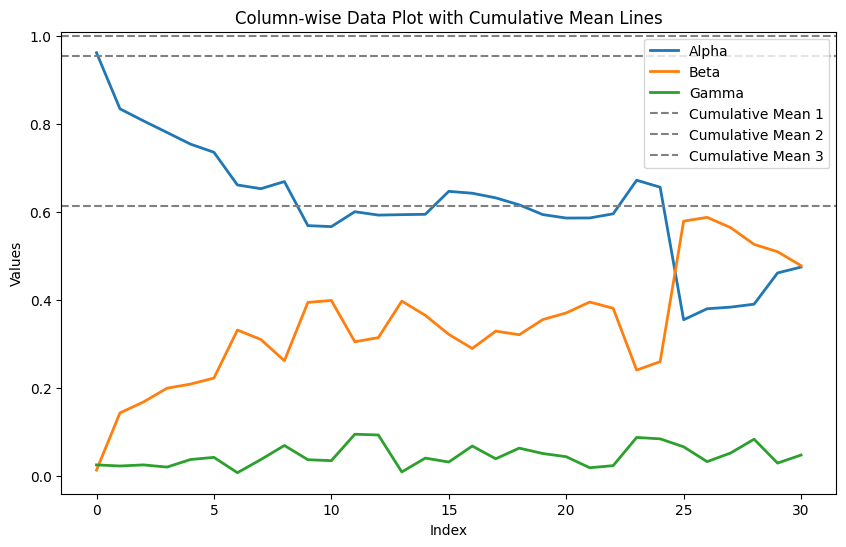

In [14]:
# Convert list of lists to a numpy array for easier manipulation
data = np.array(Weight_Record1)

# Calculate the column-wise means
column_means = data.mean(axis=0)

# Cumulative sums for plotting dashed lines
cumulative_means = np.cumsum(column_means)

print(column_means)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each column with thicker lines
for i, label in enumerate(['Alpha', 'Beta', 'Gamma']):
    plt.plot(data[:, i], label=label, linewidth=2)  # Thicker line for each column

# Plot dashed cumulative mean lines
for i, cumulative_mean in enumerate(cumulative_means):
    plt.axhline(y=cumulative_mean, linestyle='--', color='gray', label=f'Cumulative Mean {i+1}')

# Add legend and labels
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Column-wise Data Plot with Cumulative Mean Lines')
plt.legend()

# Show the plot
plt.show()
c1=column_means
import copy
# 保留现在的蚂蚁
TestAgent1=copy.deepcopy(agent)

In [18]:
# 在必要时刻重新恢复蚂蚁到第一次学习完成的状态
agent=copy.deepcopy(TestAgent1)

[388.675]
[369.885]
[351.89]
[348.905]
[330.42]
[336.85]
[344.175]
[322.435]
实际走了 252 步


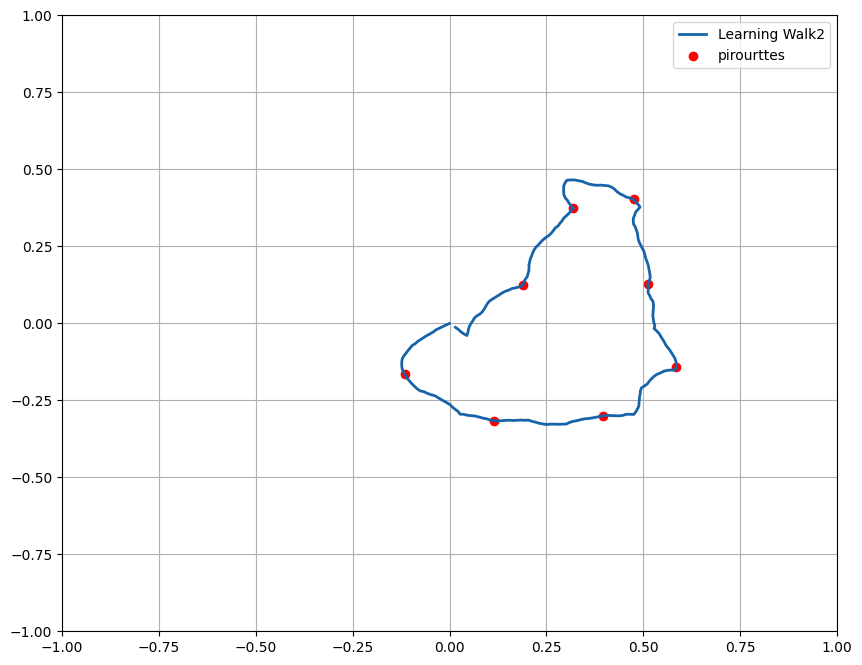

0.6220203568693307 0.31108003113171595


In [19]:
import math
# 每次探索时间会以4倍增加，将第一次的实际步长作为参照
T=2.5
TotalStep=math.ceil(T*Actual_Step1)
# 计算先验Count
# 求上一次实验的扫描次数
Actual_ScanCount1=len(LWLX1)
# 第一次与第二次扫描次数的倍数
Times12=2
Count=math.ceil(TotalStep/(Actual_ScanCount1*Times12))
LWX2,LWY2,LWLX2,LWLY2,LWH2,LWL2,LWV2,LWHead2,Actual_Step2,Weight_Record2,T2,T_Scan2=agent.AllWalk1(Count=Count,StepUnit=0.01,Total_Step=TotalStep,beta=0.7,Proper_PI_Distance=0.60,
                                                                         kappa=30, eps=0.02, Step_minRate=0.20,Step_maxRate=0.85,Scan_Interval=30, sigma=0.18,random_rate=0.92)
# 绘制轨迹图
plt.figure(figsize=(10, 8))
plt.plot(LWX2, LWY2, color='#1663A9', linewidth=2, label='Learning Walk2')
plt.scatter(LWLX2, LWLY2, color='red', marker='o', label='pirourttes')
plt.legend()
plt.grid(True)
plt.xlim([-1,1]);plt.ylim([-1,1])
plt.show()


D2=helper_function.OneWalk_MaxDistance(LWX2,LWY2);A2=helper_function.OneWalk_TotleArea(LWX2[1::4],LWY2[1::4])
print(D2,A2)

[0.14957586 0.74021379 0.11021724]


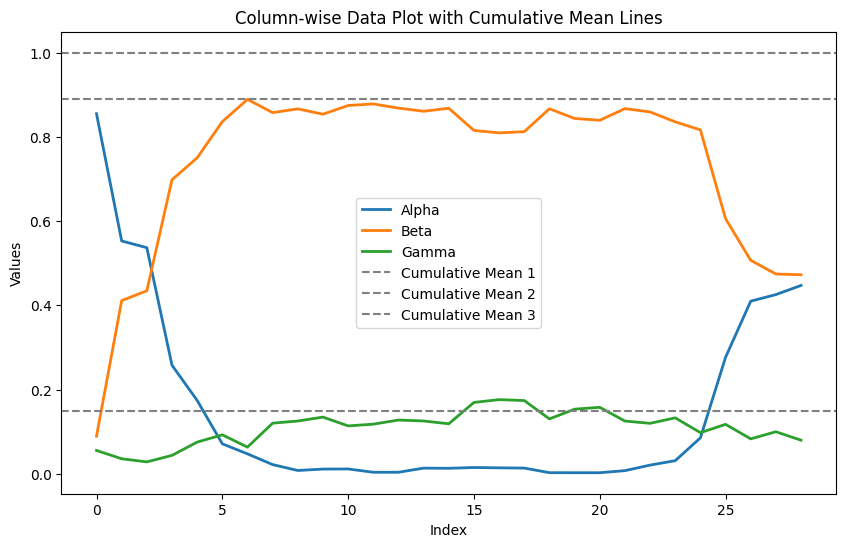

In [20]:
# Convert list of lists to a numpy array for easier manipulation
data = np.array(Weight_Record2)

# Calculate the column-wise means
column_means = data.mean(axis=0)

# Cumulative sums for plotting dashed lines
cumulative_means = np.cumsum(column_means)

print(column_means)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each column with thicker lines
for i, label in enumerate(['Alpha', 'Beta', 'Gamma']):
    plt.plot(data[:, i], label=label, linewidth=2)  # Thicker line for each column

# Plot dashed cumulative mean lines
for i, cumulative_mean in enumerate(cumulative_means):
    plt.axhline(y=cumulative_mean, linestyle='--', color='gray', label=f'Cumulative Mean {i+1}')

# Add legend and labels
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Column-wise Data Plot with Cumulative Mean Lines')
plt.legend()

# Show the plot
plt.show()
c2=column_means
# 保留现在的蚂蚁
TestAgent2=copy.deepcopy(agent)

In [21]:
# 在必要时刻重新恢复蚂蚁到第二次学习完成的状态
agent=copy.deepcopy(TestAgent2)

[311.46]
[297.415]
[293.485]
[294.375]
[278.37]
[274.79]
[269.33]
[287.115]
[286.11]
[263.53]
[284.275]
实际走了 630 步


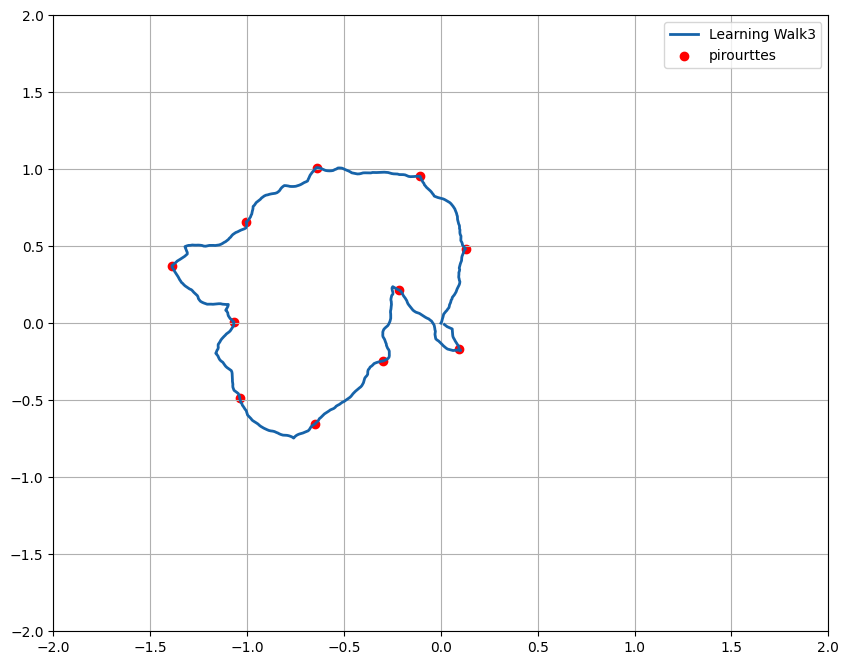

1.4372075942712161 1.5768639432006566


In [22]:
import math
# 每次探索时间会以4倍增加，将第一次的实际步长作为参照
T=2.2
TotalStep=math.ceil(T*Actual_Step2)
# 计算先验Count
# 求上一次实验的扫描次数
Actual_ScanCount2=len(LWLX2)
# 第一次与第二次扫描次数的倍数
Times23=1.25
Count=math.ceil(TotalStep/(Actual_ScanCount2*Times23))
LWX3,LWY3,LWLX3,LWLY3,LWH3,LWL3,LWV3,LWHead3,Actual_Step3,Weight_Record3,T3,T_Scan3=agent.AllWalk1(Count=Count,StepUnit=0.01,Total_Step=TotalStep,beta=1.50,Proper_PI_Distance=1.00,
                                                                         kappa=30, eps=0.02, Step_minRate=0.25,Step_maxRate=0.85,Scan_Interval=30, sigma=0.18,random_rate=0.96)
# 绘制轨迹图
plt.figure(figsize=(10, 8))
plt.plot(LWX3, LWY3, color='#1663A9', linewidth=2, label='Learning Walk3')
plt.scatter(LWLX3, LWLY3, color='red', marker='o', label='pirourttes')
plt.legend()
plt.grid(True)
plt.xlim([-2,2]);plt.ylim([-2,2])
plt.show()


D3=helper_function.OneWalk_MaxDistance(LWX3,LWY3);A3=helper_function.OneWalk_TotleArea(LWX3[1::4],LWY3[1::4])
print(D3,A3)

[0.08968158 0.66082105 0.24949474]


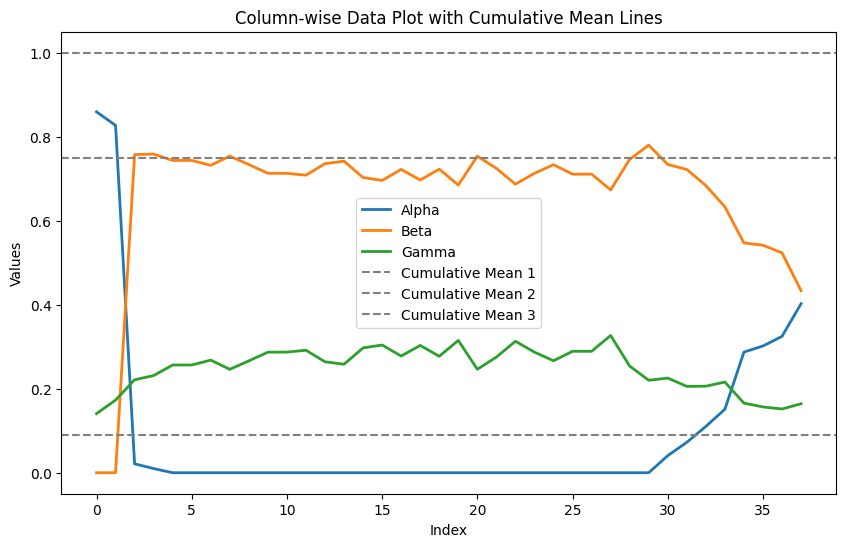

In [23]:
# Convert list of lists to a numpy array for easier manipulation
data = np.array(Weight_Record3)

# Calculate the column-wise means
column_means = data.mean(axis=0)

# Cumulative sums for plotting dashed lines
cumulative_means = np.cumsum(column_means)

print(column_means)

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot each column with thicker lines
for i, label in enumerate(['Alpha', 'Beta', 'Gamma']):
    plt.plot(data[:, i], label=label, linewidth=2)  # Thicker line for each column

# Plot dashed cumulative mean lines
for i, cumulative_mean in enumerate(cumulative_means):
    plt.axhline(y=cumulative_mean, linestyle='--', color='gray', label=f'Cumulative Mean {i+1}')

# Add legend and labels
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Column-wise Data Plot with Cumulative Mean Lines')
plt.legend()

# Show the plot
plt.show()
c3=column_means
# 保留现在的蚂蚁
TestAgent3=copy.deepcopy(agent)

In [ ]:
# 在必要时刻重新恢复蚂蚁到第三次学习完成的状态
agent=copy.deepcopy(TestAgent3)

[260.45]
[272.92]
[307.385]
[280.495]
[250.93]
[217.72]
[213.17]
[213.045]
[201.085]
实际走了 1438 步


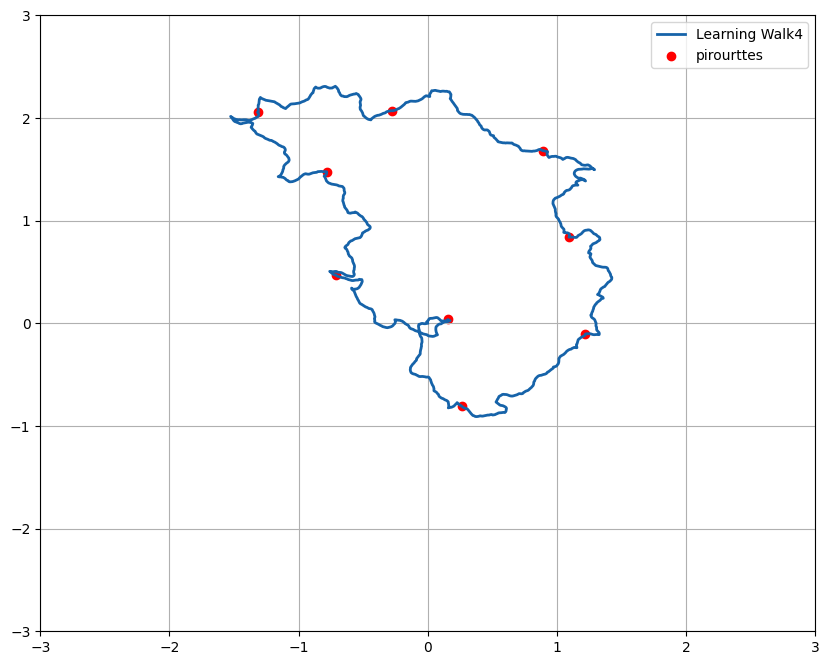

NameError: name 'My_TestFunction' is not defined

In [24]:
import math
# 每次探索时间会以4倍增加，将第一次的实际步长作为参照
T=2.25
TotalStep=math.ceil(T*Actual_Step3)
# 计算先验Count
# 求上一次实验的扫描次数
Actual_ScanCount3=len(LWLX3)
# 第一次与第二次扫描次数的倍数
Times34=0.8
Count=math.ceil(TotalStep/(Actual_ScanCount3*Times34))
LWX4,LWY4,LWLX4,LWLY4,LWH4,LWL4,LWV4,LWHead4,Actual_Step4,Weight_Record4,T4,T_Scan4=agent.AllWalk1(Count=Count,StepUnit=0.01,Total_Step=TotalStep,beta=1.50,Proper_PI_Distance=2.00,
                                                                         kappa=15, eps=0.02, Step_minRate=0.35,Step_maxRate=0.85,Scan_Interval=15, sigma=0.14,random_rate=0.92)
# 绘制轨迹图
plt.figure(figsize=(10, 8))
plt.plot(LWX4, LWY4, color='#1663A9', linewidth=2, label='Learning Walk4')
plt.scatter(LWLX4, LWLY4, color='red', marker='o', label='pirourttes')
plt.legend()
plt.grid(True)
plt.xlim([-3,3]);plt.ylim([-3,3])
plt.show()


D4=helper_function.OneWalk_MaxDistance(LWX4,LWY4);A4=helper_function.OneWalk_TotleArea(LWX4[1::4],LWY4[1::4])
print(D4,A4)

In [25]:
D4=helper_function.OneWalk_MaxDistance(LWX4,LWY4);A4=helper_function.OneWalk_TotleArea(LWX4[1::4],LWY4[1::4])
print(D4,A4)

2.552847030689316 4.7921544952764865
